NAMA : Refadli DWi Ilham<br>NIM : 211351121<br>KELAS : Pagi

##IMPORT DATASET

In [33]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"refadlidwiilham","key":"9e104ac606397ae6fa8c181f4b388f0d"}'}

In [34]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [35]:
!kaggle datasets download -d elikplim/car-evaluation-data-set

car-evaluation-data-set.zip: Skipping, found more recently modified local copy (use --force to force download)


In [36]:
!mkdir car-evaluation-data-set
!unzip car-evaluation-data-set.zip -d car-evaluation-data-set
!ls car-evaluation-data-set

car_evaluation.csv


##IMPORT LIBRARY

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

##DATA DISCOVERY

In [38]:
df = pd.read_csv('car-evaluation-data-set/car_evaluation.csv')
df.sample()

,vhigh,vhigh.1,2,2.1,small,low,unacc
1126,med,med,3,more,small,high,acc


In [39]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [40]:
df.describe()

,vhigh,vhigh.1,2,2.1,small,low,unacc
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [42]:
df.isna().sum()

vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64

In [43]:
df.nunique()

vhigh      4
vhigh.1    4
2          4
2.1        3
small      3
low        3
unacc      4
dtype: int64

In [44]:
df.duplicated().sum()

0

In [45]:
df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


##EDA

<Axes: >

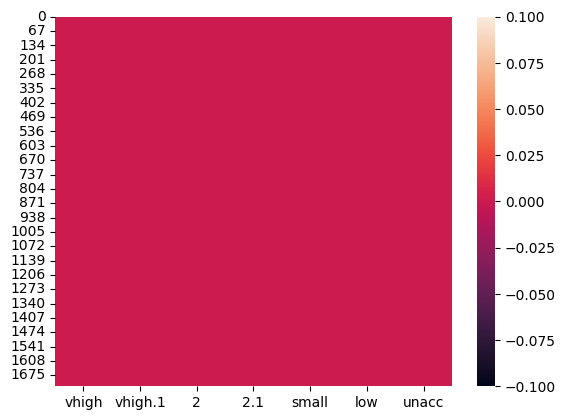

In [46]:
sns.heatmap(df.isnull())

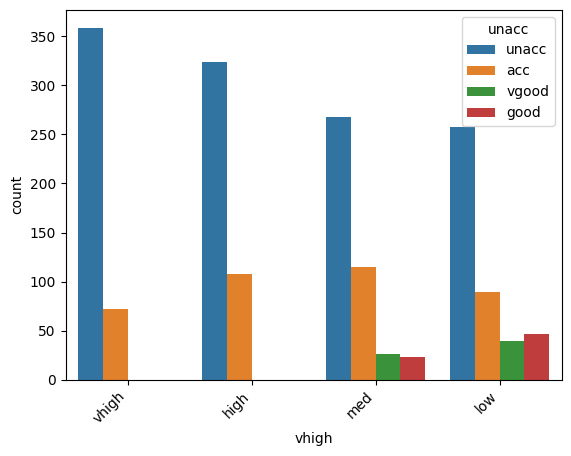

In [47]:
sns.countplot(data=df,x='vhigh',hue='unacc')
plt.xticks(rotation=45, ha='right');

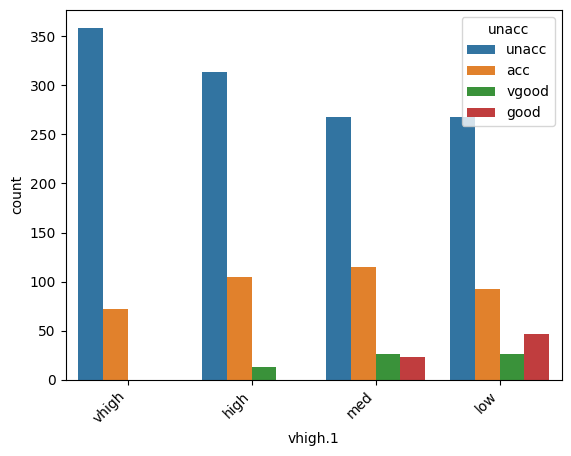

In [48]:
sns.countplot(data=df,x='vhigh.1',hue='unacc')
plt.xticks(rotation=45, ha='right');

<Axes: xlabel='unacc', ylabel='Count'>

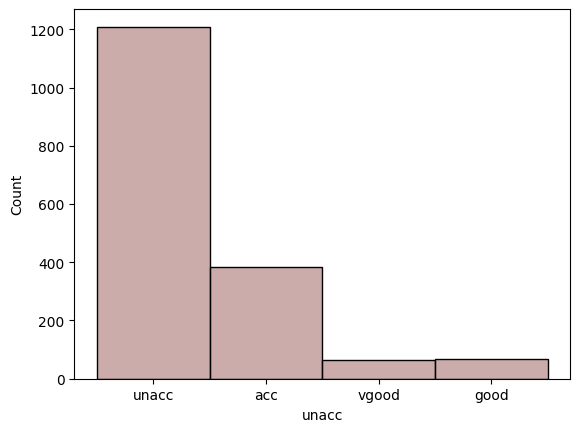

In [49]:
sns.histplot(x="unacc",data=df ,color = 'rosybrown')

<Axes: >

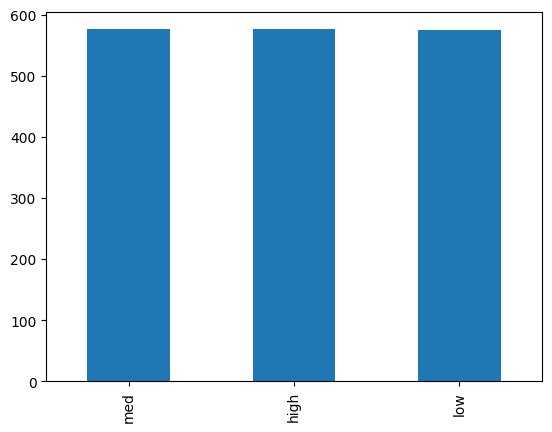

In [50]:
df['low'].value_counts().plot(kind='bar')

<Axes: xlabel='count', ylabel='2.1'>

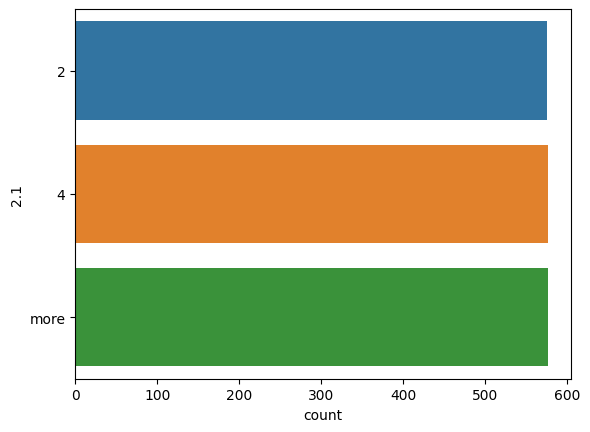

In [51]:
sns.countplot(data=df,y='2.1')

##PREPROCESSING

In [52]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

df.columns = col_names

col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [53]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

for col in col_names:

    print(df[col].value_counts())

high     432
med      432
low      432
vhigh    431
Name: buying, dtype: int64
high     432
med      432
low      432
vhigh    431
Name: maint, dtype: int64
3        432
4        432
5more    432
2        431
Name: doors, dtype: int64
4       576
more    576
2       575
Name: persons, dtype: int64
med      576
big      576
small    575
Name: lug_boot, dtype: int64
med     576
high    576
low     575
Name: safety, dtype: int64
unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [54]:
le=LabelEncoder()

In [55]:
non_numeric_cols=[]
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        pass
    else:
        non_numeric_cols.append(col)
for col in non_numeric_cols:
    df[col]=le.fit_transform(df[col])

In [56]:
atribut = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']
x = df[atribut]
y = df['class']
x.shape, y.shape

((1727, 6), (1727,))

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=0)

##MODELING

In [59]:
dtc = DecisionTreeClassifier(
    ccp_alpha=0.0, class_weight=None, criterion='entropy',
    max_depth=4, max_features=None, max_leaf_nodes=None,
    min_impurity_decrease=0.0, min_samples_leaf=1,
    min_samples_split=2, min_weight_fraction_leaf=0.0,
    random_state=42, splitter='best'
)

model = dtc.fit(x_train, y_train)

dtc_acc = accuracy_score(y_test, dtc.predict(x_test))

print(f"akurasi data training =  {accuracy_score(y_train, dtc.predict(x_train))}")
print(f"akurasi data testing = {dtc_acc} \n")

print(f"confusion matrix : \n{confusion_matrix(y_test, dtc.predict(x_test))}\n")
confusion = confusion_matrix(y_test, dtc.predict(x_test))
print(f"classification report : \n{classification_report(y_test, dtc.predict(x_test))}")

akurasi data training =  0.8283852280955829
akurasi data testing = 0.8121387283236994 

confusion matrix : 
[[ 70   0   7   0]
 [ 14   0   0   0]
 [ 28   0 211   0]
 [ 16   0   0   0]]

classification report : 
              precision    recall  f1-score   support

           0       0.55      0.91      0.68        77
           1       0.00      0.00      0.00        14
           2       0.97      0.88      0.92       239
           3       0.00      0.00      0.00        16

    accuracy                           0.81       346
   macro avg       0.38      0.45      0.40       346
weighted avg       0.79      0.81      0.79       346



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
input_data = (3,	3,	1,	1,	2,	1)

input_data_as_numpy_array = np.array(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshape)
print(prediction)

if (prediction== 1):
    print("Kelas yang diprediksi adalah 1.")
elif (prediction == 2):
    print("Kelas yang diprediksi adalah 2.")
elif (prediction == 3):
    print("Kelas yang diprediksi adalah 3.")
else:
    print("Kelas yang diprediksi adalah 4.")

[2]
Kelas yang diprediksi adalah 2.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


##VISUALISASI

[Text(0.4583333333333333, 0.9, 'x[3] <= 0.5\nentropy = 1.196\nsamples = 1381\nvalue = [307, 55, 970, 49]'),
 Text(0.375, 0.7, 'entropy = 0.0\nsamples = 463\nvalue = [0, 0, 463, 0]'),
 Text(0.5416666666666666, 0.7, 'x[5] <= 0.5\nentropy = 1.47\nsamples = 918\nvalue = [307, 55, 507, 49]'),
 Text(0.3333333333333333, 0.5, 'x[0] <= 2.5\nentropy = 1.646\nsamples = 299\nvalue = [165, 21, 64, 49]'),
 Text(0.16666666666666666, 0.3, 'x[0] <= 0.5\nentropy = 1.612\nsamples = 221\nvalue = [127, 21, 24, 49]'),
 Text(0.08333333333333333, 0.1, 'entropy = 0.785\nsamples = 77\nvalue = [59, 0, 18, 0]'),
 Text(0.25, 0.1, 'entropy = 1.636\nsamples = 144\nvalue = [68, 21, 6, 49]'),
 Text(0.5, 0.3, 'x[1] <= 2.5\nentropy = 1.0\nsamples = 78\nvalue = [38, 0, 40, 0]'),
 Text(0.4166666666666667, 0.1, 'entropy = 0.918\nsamples = 57\nvalue = [38, 0, 19, 0]'),
 Text(0.5833333333333334, 0.1, 'entropy = 0.0\nsamples = 21\nvalue = [0, 0, 21, 0]'),
 Text(0.75, 0.5, 'x[5] <= 1.5\nentropy = 1.063\nsamples = 619\nvalue = 

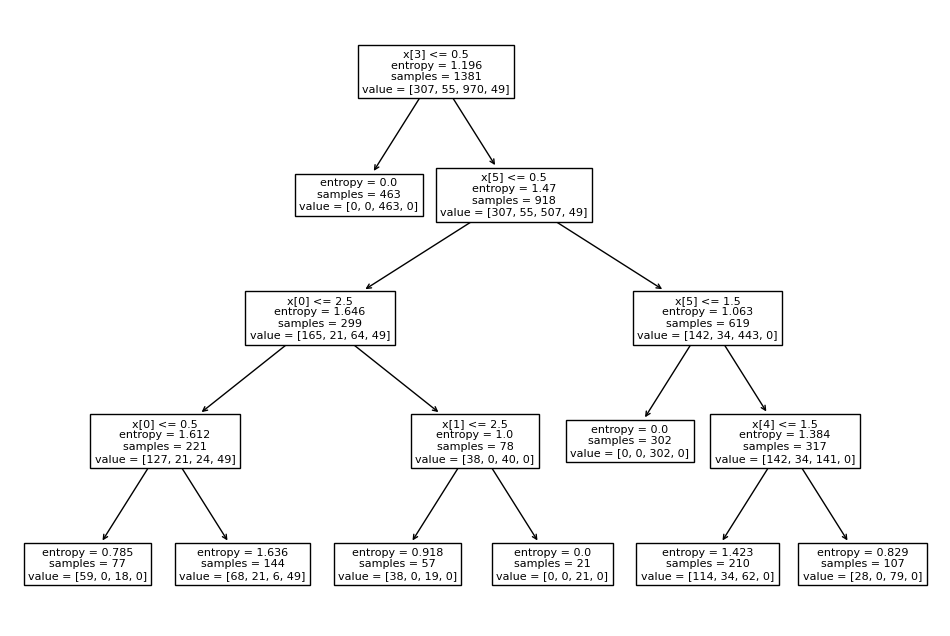

In [61]:
plt.figure(figsize=(12,8))

tree.plot_tree(dtc.fit(x_train, y_train))

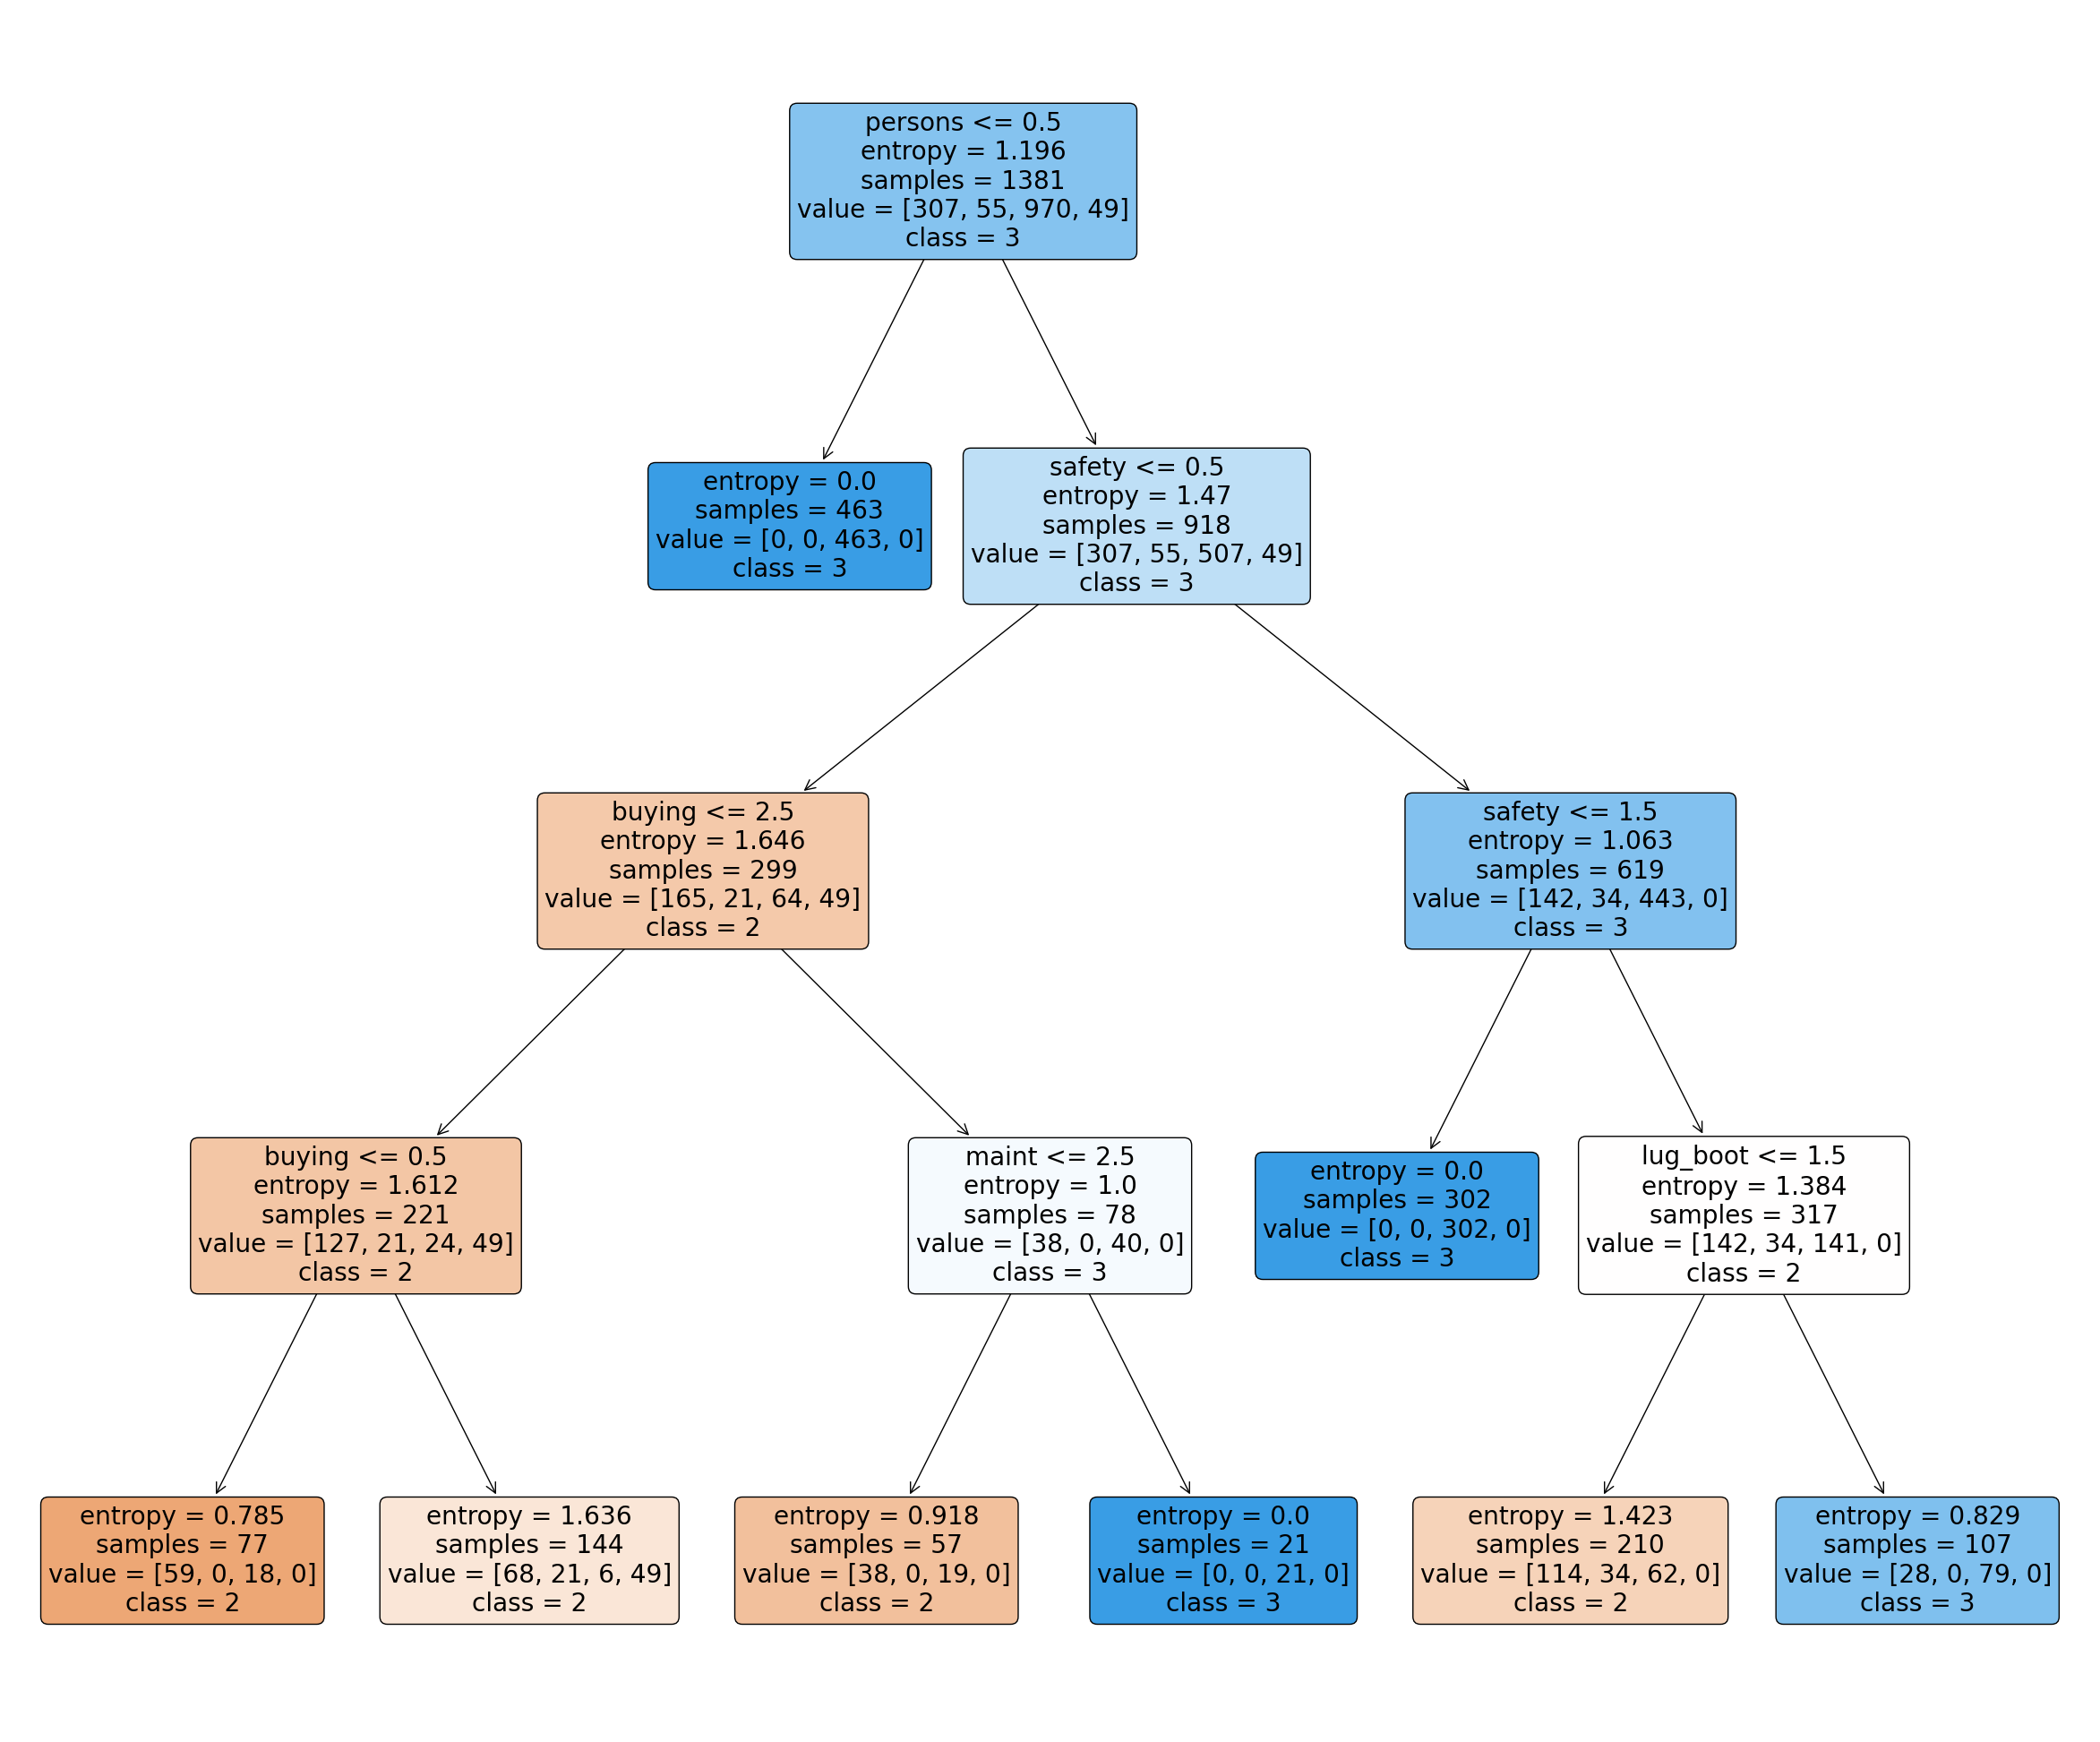

In [80]:
fig = plt.figure(figsize=(30,25))
_ = tree.plot_tree(model,
                     feature_names=x_train.columns,
                     class_names=list(map(str, y_train.unique())),
                      filled=True, rounded=True
)

##SAVE MODEL

In [57]:
df.to_csv('car-evaluation-data.csv')

In [62]:
filename = 'car-evaluation-data.sav'
pickle.dump(dtc,open(filename,'wb'))